In [4]:
class arabicCorpusUtils:
    
    def __init__(self, corpusFile = '/media/elbially/01D1AAB2BBFDFB60/Speech Experiments/arabicCorpus.txt'):
        self.corpusFile = corpusFile
        
    def ReadCorpus(self):
        
        import numpy as np

        corpus = []
        
        for i in open (self.corpusFile):
            tmp = i.split('\n')[0]
            if not (tmp == ''):
                corpus.append(i.decode('utf-8'))
                corpus = [r.split('\n')[0] for r in corpus]
                
        self.corpus = np.array(corpus)
        
    def GenerateCorpus(self, numWords, numRepeate, fileName, pltFlag = True, saveDir = 'uniformCorpus.jpg'):
        
        import numpy as np
        import matplotlib.pyplot as plt
        %matplotlib inline
        
        corpusIndx = np.arange(self.corpus.shape[0]) #generate array from 0:length(corpus)-1
        reapeatedIndx = np.repeat(corpusIndx,numRepeate) #Repeate the indecis 
        np.random.shuffle(reapeatedIndx) #randomly shuffle these indcices so the generated words looks random
        numSentences = reapeatedIndx.shape[0]/numWords
        arrayOfIndx = np.array_split(reapeatedIndx,numSentences)

        f = open(fileName, "w")
        for i in xrange(0,numSentences):
            sent = self.corpus[arrayOfIndx[i]]
            sent = sent.tolist()
            sent = '%03d' % (i+1) + '. ' + ' '.join(sent)
            f.write(sent.encode('utf-8') + '\n' + '\r\n')
            print sent
        f.close()

        if pltFlag is True :
            hist, bins = np.histogram(reapeatedIndx, bins=corpusIndx+1)
            width = 0.7 * (bins[1] - bins[0])
            center = (bins[:-1] + bins[1:]) / 2
            plt.bar(center, hist, align='center', width=width)
            fig = plt.gcf()
            plt.show()
            fig.savefig(saveDir, transparent=True, bbox_inches="tight",dpi = 1000)
            
    def GenerateCorpusBetter(self, numWords, numRepeate, fileName, pltFlag = True, saveDir = 'uniformCorpus.jpg'):
        
        import numpy as np
        import matplotlib.pyplot as plt
        %matplotlib inline
        import pandas
        from collections import Counter
        
        listOfWords = self.randomize_carefully(self.corpus.tolist(),numRepeate)
        arrayOfWords = np.array(listOfWords)
        numSentences = arrayOfWords.shape[0]/numWords
        arrayOfSentences= np.array_split(arrayOfWords,numSentences)
    
        f = open(fileName,"w")
        for i in xrange(0,numSentences):
            sent = arrayOfSentences[i]
            sent = sent.tolist()
            sent = '%03d' % (i+1) + '. ' + ' '.join(sent)
            f.write(sent.encode('utf-8') + '\n' + '\r\n')
            print sent
        f.close()   
        
        if pltFlag is True :
            word_counts = Counter(listOfWords)
            df = pandas.DataFrame.from_dict(word_counts, orient='index')
            ax = df.plot(kind='bar') 
            fig = ax.get_figure()
            fig.savefig(saveDir, dpi = 1000)
    
    def randomize_carefully(self,words, n_repeat=10):
        import random
        s = set(words)
        res = []
        for n in range(n_repeat):
            if res:
                # Avoid the last placed element
                lst = list(s.difference({res[-1]}))
                # Shuffle
                random.shuffle(lst)
                lst.append(res[-1])
                # Shuffle once more to avoid obvious repeating patterns in the last position
                lst[1:] = random.sample(lst[1:], len(lst)-1)
            else:
                lst = words[:]
                random.shuffle(lst)
            res.extend(lst)
        return res  
    
    
    def GenerateWords(self, numRepeate, fileName, pltFlag = True, saveDir = 'uniformCorpus.jpg'):
        
        import numpy as np
        import matplotlib.pyplot as plt
        %matplotlib inline
        
        corpusIndx = np.arange(self.corpus.shape[0]) #generate array from 0:length(corpus)-1
        reapeatedIndx = np.repeat(corpusIndx,numRepeate) #Repeate the indecis 
        np.random.shuffle(reapeatedIndx) #randomly shuffle these indcices so the generated words looks random
        
        f = open(fileName, "w")
        for i in xrange(0,reapeatedIndx.size):
            sent = self.corpus[reapeatedIndx[i]]
            sent = sent.tolist()
            sent = '%03d' % (i+1) + '. ' + sent
            f.write(sent.encode('utf-8') + '\n' + '\r\n')
            print sent
        f.close()

        if pltFlag is True :
            hist, bins = np.histogram(reapeatedIndx, bins=corpusIndx+1)
            width = 0.7 * (bins[1] - bins[0])
            center = (bins[:-1] + bins[1:]) / 2
            plt.bar(center, hist, align='center', width=width)
            fig = plt.gcf()
            plt.show()
            fig.savefig(saveDir, transparent=True, bbox_inches="tight",dpi = 1000)
            
    def GenerateWordsBetter(self,numRepeate, fileName, pltFlag = True, saveDir = 'uniformCorpus.jpg'):
        
        import numpy as np
        import matplotlib.pyplot as plt
        %matplotlib inline
        import pandas
        from collections import Counter
        
        listOfWords = self.randomize_carefully(self.corpus.tolist(),numRepeate)
    
        f = open(fileName,"w")
        for i in xrange(0,len(listOfWords)):
            sent = '%03d' % (i+1) + '. ' + listOfWords[i]
            f.write(sent.encode('utf-8') + '\n' + '\r\n')
            print sent
        f.close()   
        
        if pltFlag is True :
            word_counts = Counter(listOfWords)
            df = pandas.DataFrame.from_dict(word_counts, orient='index')
            ax = df.plot(kind='bar') 
            fig = ax.get_figure()
            fig.savefig(saveDir, dpi = 1000)
        
        
    def CalculateEditDistance(self,pltFlag = True,saveDir = 'EditDistance.png'):
        
        import matplotlib.pyplot as plt
        import numpy as np
        from Levenshtein import distance
        
        %matplotlib inline
        
        dist = np.empty((self.corpus.shape[0],self.corpus.shape[0]))
        for i in xrange(0,self.corpus.shape[0]):
            for j in xrange (0,self.corpus.shape[0]):
            
                dist[i][j] = distance(self.corpus[i],self.corpus[j])
        
        self.editDistance = dist
        
        if pltFlag is True :
            plt.imshow(dist, interpolation='nearest')
            x = self.corpus.tolist()
            plt.xticks(np.arange(0,self.corpus.shape[0]), self.corpus,rotation=90)
            plt.yticks(np.arange(0,self.corpus.shape[0]), self.corpus)
            plt.colorbar()
            plt.title("Edit distance matrix")
            plt.tight_layout()
            fig = plt.gcf()
            plt.show()
            fig.savefig(saveDir, bbox_inches="tight",dpi = 1000)
            
    def histogramOfLetters(self, saveDir = 'lettersCounter.png'):
    
        import pandas
        import numpy as np
        from collections import Counter
        
        corpusList = self.corpus
        corpusList.tolist()
        letters = list(' '.join(corpusList))
        letter_counts = Counter(letters)
        df = pandas.DataFrame.from_dict(letter_counts, orient='index')
        ax = df.plot(kind='bar') 
        fig = ax.get_figure()
        fig.savefig(saveDir, dpi = 1000)
    
    def histogramOfPhonemes(self, saveDir = 'lettersCounter.png'):  
        
        import nltk
        arpabet = nltk.corpus.cmudict.dict()

        for word in self.corpus:
            try:
                print arpabet[word][0]
            except Exception as e:
                print e

001. أثنين السبت  الجمعة اليوم
002. صفر اﻷثنين أمس الثلاثاء
003. الأربعاء واحد سبعة الخميس
004. تسعة ستة ثمانية الأحد 
005. أربعة ثلاثة عشرة خمسة
006. ستة الخميس اﻷثنين عشرة
007. ثمانية أثنين صفر الثلاثاء
008. أمس أربعة ثلاثة الأربعاء
009. السبت  الأحد  سبعة اليوم
010. واحد الجمعة تسعة خمسة
011. الثلاثاء تسعة الأربعاء الجمعة
012. سبعة ثمانية أمس اﻷثنين
013. خمسة صفر الخميس واحد
014. السبت  اليوم عشرة أربعة
015. ستة أثنين الأحد  ثلاثة
016. الأربعاء ثلاثة السبت  الثلاثاء
017. عشرة أثنين ثمانية اليوم
018. الجمعة سبعة خمسة أربعة
019. تسعة ستة واحد الخميس
020. الأحد  اﻷثنين أمس صفر
021. ثمانية اﻷثنين صفر خمسة
022. الثلاثاء أمس ثلاثة الجمعة
023. الأحد  أربعة السبت  اليوم
024. واحد الخميس سبعة الأربعاء
025. ستة أثنين تسعة عشرة
026. واحد تسعة أمس الثلاثاء
027. أثنين الأربعاء ستة ثمانية
028. عشرة الجمعة اليوم اﻷثنين
029. خمسة صفر ثلاثة الأحد 
030. الخميس أربعة سبعة السبت 
031. تسعة السبت  ستة الجمعة
032. واحد الأحد  الثلاثاء اﻷثنين
033. أربعة أثنين ثمانية عشرة
034. ثلاثة خمسة الخميس سبعة
035. ا

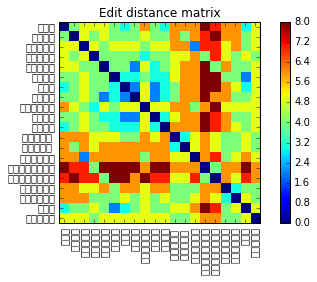

In [5]:
util = arabicCorpusUtils()
util.ReadCorpus()
util.histogramOfLetters()
util.GenerateCorpusBetter (4,20,'testArabic.txt',True)
#util.GenerateCorpus (4,7,'testArabic.txt',True)
#util.GenerateWordsBetter(7,'test.txt',False)
util.CalculateEditDistance(pltFlag=True)

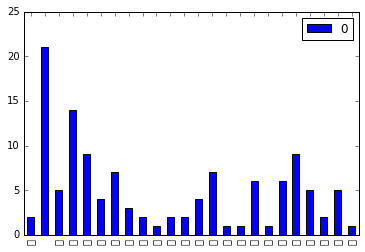

In [3]:
util = arabicCorpusUtils()
util.ReadCorpus()
util.CalculateEditDistance()
util.histogramOfLetters()
#util.histogramOfPhonemes()
#util.GenerateWords(7,'./S01/Training/CorpusTrain_S01.txt',False)
#util.GenerateCorpus (4,7,'./S01/Training/CorpusTrain_S01.txt',False)
#util.GenerateCorpus (4,7,'./S02/Training/CorpusTrain_S02.txt',False)
#util.GenerateCorpus (4,7,'./S03/Training/CorpusTrain_S03.txt',False)
#util.GenerateCorpus (4,7,'./S04/Training/CorpusTrain_S04.txt',False)
#util.GenerateCorpus (4,7,'./S05/Training/CorpusTrain_S05.txt',False)
#util.GenerateCorpus (4,7,'./S06/Training/CorpusTrain_S06.txt',False)
#util.GenerateCorpus (4,7,'./S07/Training/CorpusTrain_S07.txt',False)
#util.GenerateCorpus (4,7,'./S08/Training/CorpusTrain_S08.txt',False)
#util.GenerateCorpus (4,7,'./S09/Training/CorpusTrain_S09.txt',False)
#util.GenerateCorpus (4,7,'./S10/Training/CorpusTrain_S10.txt',False)
#util.GenerateCorpus (4,3,'./S01/Testing/CorpusTest_S01.txt',False)
#util.GenerateCorpus (4,3,'./S02/Testing/CorpusTest_S02.txt',False)
#util.GenerateCorpus (4,3,'./S03/Testing/CorpusTest_S03.txt',False)
#util.GenerateCorpus (4,3,'./S04/Testing/CorpusTest_S04.txt',False)
#util.GenerateCorpus (4,3,'./S05/Testing/CorpusTest_S05.txt',False)
#util.GenerateCorpus (4,3,'./S06/Testing/CorpusTest_S06.txt',False)
#util.GenerateCorpus (4,3,'./S07/Testing/CorpusTest_S07.txt',False)
#util.GenerateCorpus (4,3,'./S08/Testing/CorpusTest_S08.txt',False)
#util.GenerateCorpus (4,3,'./S09/Testing/CorpusTest_S09.txt',False)
#util.GenerateCorpus (4,3,'./S10/Testing/CorpusTest_S10.txt',False)

In [6]:
util = arabicCorpusUtils()
util.ReadCorpus()
#util.CalculateEditDistance()
#util.histogramOfLetters()
#util.histogramOfPhonemes()
#util.GenerateWordsBetter(20,'./S01/Training/CorpusTrain_S01.txt',False)
util.GenerateCorpusBetter (4,20,'./ArabicExperiment/S01/S01_Training/CorpusTrain_S01.txt',False)
util.GenerateCorpusBetter (4,20,'./ArabicExperiment/S02/S02_Training/CorpusTrain_S02.txt',False)
util.GenerateCorpusBetter (4,20,'./ArabicExperiment/S03/S03_Training/CorpusTrain_S03.txt',False)
util.GenerateCorpusBetter (4,20,'./ArabicExperiment/S04/S04_Training/CorpusTrain_S04.txt',False)
util.GenerateCorpusBetter (4,20,'./ArabicExperiment/S05/S05_Training/CorpusTrain_S05.txt',False)
util.GenerateCorpusBetter (4,20,'./ArabicExperiment/S06/S06_Training/CorpusTrain_S06.txt',False)
util.GenerateCorpusBetter (4,20,'./ArabicExperiment/S07/S07_Training/CorpusTrain_S07.txt',False)
util.GenerateCorpusBetter (4,20,'./ArabicExperiment/S08/S08_Training/CorpusTrain_S08.txt',False)
util.GenerateCorpusBetter (4,20,'./ArabicExperiment/S09/S09_Training/CorpusTrain_S09.txt',False)
util.GenerateCorpusBetter (4,20,'./ArabicExperiment/S10/S10_Training/CorpusTrain_S10.txt',False)
util.GenerateCorpusBetter (4,20,'./ArabicExperiment/S11/S11_Training/CorpusTrain_S11.txt',False)
util.GenerateCorpusBetter (4,20,'./ArabicExperiment/S12/S12_Training/CorpusTrain_S12.txt',False)
util.GenerateCorpusBetter (4,20,'./ArabicExperiment/S13/S13_Training/CorpusTrain_S13.txt',False)
util.GenerateCorpusBetter (4,20,'./ArabicExperiment/S14/S14_Training/CorpusTrain_S14.txt',False)
util.GenerateCorpusBetter (4,20,'./ArabicExperiment/S15/S15_Training/CorpusTrain_S15.txt',False)
util.GenerateCorpusBetter (4,20,'./ArabicExperiment/S16/S16_Training/CorpusTrain_S16.txt',False)
util.GenerateCorpusBetter (4,20,'./ArabicExperiment/S17/S17_Training/CorpusTrain_S17.txt',False)
util.GenerateCorpusBetter (4,20,'./ArabicExperiment/S18/S18_Training/CorpusTrain_S18.txt',False)
util.GenerateCorpusBetter (4,20,'./ArabicExperiment/S19/S19_Training/CorpusTrain_S19.txt',False)
util.GenerateCorpusBetter (4,20,'./ArabicExperiment/S20/S20_Training/CorpusTrain_S20.txt',False)
util.GenerateCorpusBetter (4,10,'./ArabicExperiment/S01/S01_Testing/CorpusTest_S01.txt',False)
util.GenerateCorpusBetter (4,10,'./ArabicExperiment/S02/S02_Testing/CorpusTest_S02.txt',False)
util.GenerateCorpusBetter (4,10,'./ArabicExperiment/S03/S03_Testing/CorpusTest_S03.txt',False)
util.GenerateCorpusBetter (4,10,'./ArabicExperiment/S04/S04_Testing/CorpusTest_S04.txt',False)
util.GenerateCorpusBetter (4,10,'./ArabicExperiment/S05/S05_Testing/CorpusTest_S05.txt',False)
util.GenerateCorpusBetter (4,10,'./ArabicExperiment/S06/S06_Testing/CorpusTest_S06.txt',False)
util.GenerateCorpusBetter (4,10,'./ArabicExperiment/S07/S07_Testing/CorpusTest_S07.txt',False)
util.GenerateCorpusBetter (4,10,'./ArabicExperiment/S08/S08_Testing/CorpusTest_S08.txt',False)
util.GenerateCorpusBetter (4,10,'./ArabicExperiment/S09/S09_Testing/CorpusTest_S09.txt',False)
util.GenerateCorpusBetter (4,10,'./ArabicExperiment/S10/S10_Testing/CorpusTest_S10.txt',False)
util.GenerateCorpusBetter (4,10,'./ArabicExperiment/S11/S11_Testing/CorpusTest_S11.txt',False)
util.GenerateCorpusBetter (4,10,'./ArabicExperiment/S12/S12_Testing/CorpusTest_S12.txt',False)
util.GenerateCorpusBetter (4,10,'./ArabicExperiment/S13/S13_Testing/CorpusTest_S13.txt',False)
util.GenerateCorpusBetter (4,10,'./ArabicExperiment/S14/S14_Testing/CorpusTest_S14.txt',False)
util.GenerateCorpusBetter (4,10,'./ArabicExperiment/S15/S15_Testing/CorpusTest_S15.txt',False)
util.GenerateCorpusBetter (4,10,'./ArabicExperiment/S16/S16_Testing/CorpusTest_S16.txt',False)
util.GenerateCorpusBetter (4,10,'./ArabicExperiment/S17/S17_Testing/CorpusTest_S17.txt',False)
util.GenerateCorpusBetter (4,10,'./ArabicExperiment/S18/S18_Testing/CorpusTest_S18.txt',False)
util.GenerateCorpusBetter (4,10,'./ArabicExperiment/S19/S19_Testing/CorpusTest_S19.txt',False)
util.GenerateCorpusBetter (4,10,'./ArabicExperiment/S20/S20_Testing/CorpusTest_S20.txt',False)

001. أربعة ثمانية الثلاثاء تسعة
002. الأربعاء عشرة اﻷثنين سبعة
003. صفر السبت  خمسة اليوم
004. الخميس ستة أثنين واحد
005. أمس ثلاثة الجمعة الأحد 
006. تسعة واحد الثلاثاء صفر
007. خمسة الجمعة أمس اليوم
008. الخميس ثمانية ثلاثة أربعة
009. سبعة ستة عشرة اﻷثنين
010. الأربعاء السبت  الأحد  أثنين
011. عشرة ثلاثة الأربعاء الأحد 
012. سبعة أثنين ثمانية ستة
013. الخميس واحد صفر اﻷثنين
014. تسعة أربعة اليوم الثلاثاء
015. خمسة أمس الجمعة السبت 
016. اليوم الخميس أثنين سبعة
017. الأحد  ثلاثة أربعة واحد
018. ستة صفر تسعة أمس
019. الأربعاء ثمانية الثلاثاء السبت 
020. اﻷثنين الجمعة عشرة خمسة
021. أربعة اليوم الجمعة أمس
022. الثلاثاء الخميس أثنين صفر
023. خمسة واحد عشرة الأربعاء
024. ثمانية ستة اﻷثنين السبت 
025. تسعة ثلاثة الأحد  سبعة
026. اﻷثنين اليوم الجمعة عشرة
027. سبعة ثمانية ثلاثة أربعة
028. الثلاثاء ستة السبت  الأحد 
029. خمسة صفر واحد الخميس
030. تسعة أثنين أمس الأربعاء
031. أمس ستة سبعة السبت 
032. واحد الثلاثاء اليوم الأربعاء
033. اﻷثنين خمسة الخميس أثنين
034. الجمعة عشرة صفر ثمانية
035. تس